# Mindspore introduction

In [1]:
import mindspore

In [2]:
import numpy as np
from mindspore import Tensor
from mindspore import dtype

In [3]:
x = Tensor(np.array([[1,2],[3,4]]), dtype.int32)
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

In [4]:
y = Tensor(1.0, dtype.int32)
z = Tensor(2, dtype.int32)
y

Tensor(shape=[], dtype=Int32, value= 1)

In [5]:
m = Tensor(True, dtype.bool_)
m

Tensor(shape=[], dtype=Bool, value= True)

In [6]:
n = Tensor((1,2,3), dtype.int16)
n

Tensor(shape=[3], dtype=Int16, value= [1, 2, 3])

In [7]:
p = Tensor([4.0, 5.0, 6.0], dtype.float64)
p

Tensor(shape=[3], dtype=Float64, value= [ 4.00000000e+00,  5.00000000e+00,  6.00000000e+00])

In [8]:
from mindspore import ops
oneslike = ops.OnesLike()
x = Tensor(np.array([[0,1],[2,1]]).astype(np.int32))
output  = oneslike(x)
output

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 1],
 [1, 1]])

In [9]:
from mindspore.ops import operations as ops

shape = (2,2)
ones = ops.Ones()
output = ones(shape, dtype.float32)
output

Tensor(shape=[2, 2], dtype=Float32, value=
[[ 1.00000000e+00,  1.00000000e+00],
 [ 1.00000000e+00,  1.00000000e+00]])

In [10]:
zeros = ops.Zeros()
output = zeros(shape, dtype.float32)
output

Tensor(shape=[2, 2], dtype=Float32, value=
[[ 0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00]])

In [11]:
x = Tensor(np.array([[1,2],[3,4]]), dtype.int32)

# x.shape
x.ndim
# x.size
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

In [12]:
y = Tensor(np.array([[True, True],[False, False]]), dtype.bool_)

y_array = y.asnumpy()

y

Tensor(shape=[2, 2], dtype=Bool, value=
[[ True,  True],
 [False, False]])

In [13]:
tensor = Tensor(np.array([[0,1],[2,3]]).astype(np.float32))
print("First row: {}, First column: {}, Last Column: {}".format(tensor[0], tensor[:,0], tensor[...,-1]))

First row: [0. 1.], First column: [0. 2.], Last Column: [1. 3.]


In [14]:
data1 = Tensor(np.array([[0,1], [2,3]]).astype(np.float32))
data2 = Tensor(np.array([[4,5],[6,7]]).astype(np.float32))
op = ops.Stack()
output = op([data1, data2])
print(output)

[[[0. 1.]
  [2. 3.]]

 [[4. 5.]
  [6. 7.]]]


zeros = ops.Zeros()
output = zeros((2,2), dtype.float32)
print("output: {}".format(type(output)))
n_output = output.asnumpy()
print("n_output: {}".format(type(n_output)))

## Loading a Dataset

In [15]:
import os 
import mindspore.dataset as ds
import matplotlib.pyplot as plt

In [16]:
dataset_dir = "CUT/MNIST/train"
mnist_dataset = ds.MnistDataset(dataset_dir = dataset_dir, num_samples=3)

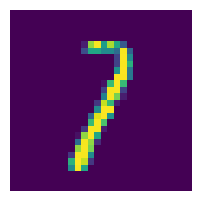

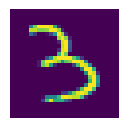

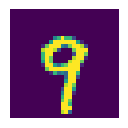

In [17]:
plt.figure(figsize=(8,8))
i=1
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(3,3,i)
    plt.imshow(dic["image"][:,:,0])
    plt.axis("off")
    i += 1
    plt.show()

### Customize a dataset 

In [18]:
import numpy as np
np.random.seed(58)

class DatasetGenerator:
    def __init__(self):
        self._data = np.random.sample((5, 2))
        self._label = np.random.sample((5, 1))

    def __getitem__(self, index):
        return self._data[index], self._label[index]

    def __len__(self):
        return len(self._data)   

dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle = False)



In [19]:
for data in dataset.create_dict_iterator():
    print("{}".format(data["data"]), "{}".format(data["label"]))

[0.36510558 0.45120592] [0.78888122]
[0.49606035 0.07562207] [0.38068183]
[0.57176158 0.28963401] [0.16271622]
[0.30880446 0.37487617] [0.54738768]
[0.81585667 0.96883469] [0.77994068]


### Perform data augmentation

In [20]:
ds.config.set_seed(58)

dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(batch_size=2)

for data in dataset.create_dict_iterator():
    print("data {}".format(data["data"]), "label {}".format(["label"])) 

data [[0.36510558 0.45120592]
 [0.57176158 0.28963401]] label ['label']
data [[0.30880446 0.37487617]
 [0.49606035 0.07562207]] label ['label']
data [[0.81585667 0.96883469]] label ['label']


Text(0.5, 1.0, '5')

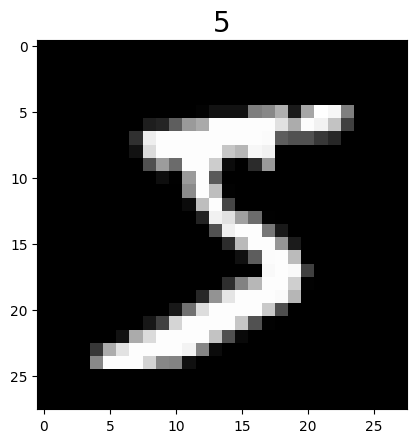

In [21]:
import matplotlib.pyplot as plt 

# from mindspore.dataset.vision import inter
import mindspore.dataset.vision.c_transforms as c_vision

DATA_DIR = "CUT/MNIST/train"

mnist_dataset = ds.MnistDataset(DATA_DIR, num_samples=6, shuffle=False)
mnist_it = mnist_dataset.create_dict_iterator()
data = next(mnist_it)

plt.imshow(data["image"].asnumpy().squeeze(), cmap=plt.cm.gray)
plt.title(data["label"].asnumpy(), fontsize=20)


## Building the network

### Build a fully connected layer

In [22]:
import mindspore as ms 
import mindspore.nn as nn
from mindspore import Tensor
import numpy as np

#construct the input tensor
input_a = Tensor(np.array([[1,1,1],[2,2,2]]), ms.float32)
print(input_a)

#Construct a fully-connected network, settings both in_channels and out channels to 2
net = nn.Dense(in_channels = 3, out_channels=3, weight_init = 1)
output = net(input_a)
print(output)


[[1. 1. 1.]
 [2. 2. 2.]]
[[3.1284747 3.0900786 3.5357811]
 [6.1284747 6.0900784 6.5357814]]


### Build a convolutional layer

In [23]:
conv2d = nn.Conv2d(1, 6, 5, has_bias=False, weight_init='normal', pad_mode = 'valid')
input_x = Tensor(np.ones([1,1,32,32]), ms.float32)
print(conv2d(input_x).shape)

(1, 6, 28, 28)


### Build a ReLU layer

In [24]:
relu = nn.ReLU()
input_x = Tensor(np.array([-1, 2, -3, 3, -2]), ms.float16)
output = relu(input_x)

print(output)

[0. 2. 0. 3. 0.]


In [25]:
max_pool2D = nn.MaxPool2d(kernel_size=2, stride=2)
input_x = Tensor(np.ones([1,6,28,28]), ms.float32)

print(max_pool2D(input_x).shape)

(1, 6, 14, 14)


In [ ]:
flatten = nn.Flatten()
input_x = Tensor(np.ones([1,16,5,5]), ms.float32)
output = flatten